In [1]:
import os
import matplotlib.pyplot as plt
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import utils1 as utils
from mrcnn import visualize
from mrcnn.model import log
ROOT_DIR = os.path.abspath("")
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
print(ROOT_DIR)

Using TensorFlow backend.


C:\Users\VCC\Desktop\Mask_RCNN


In [2]:
class ShapesConfig(Config):
    NAME = "shape"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 2
    NUM_CLASSES = 1 + 4
    IMAGE_MIN_DIM = 320
    IMAGE_MAX_DIM = 384
    RPN_ANCHOR_SCALES = (8 * 6, 16 * 6, 32 * 6, 64 * 6, 128 * 6)
    TRAIN_ROIS_PER_IMAGE = 100
    STEPS_PER_EPOCH = 100
    VALIDATION_STEPS = 50
class InferenceConfig(ShapesConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

model_path=ROOT_DIR+"/logs/quilt and baby.h5"
model_path=ROOT_DIR+"/logs/corner.h5"
model_path=ROOT_DIR+"/logs/new_one.h5"
model_path = ROOT_DIR + "/logs/2018.12.2.h5"


print("Loading weights from ", model_path)
import time
start=time.clock()
model.load_weights(model_path, by_name=True)
end=time.clock()
print(end-start)


Loading weights from  C:\Users\VCC\Desktop\Mask_RCNN/logs/2018.12.2.h5


2.7760126106716014


C:/Users/VCC/Desktop/5.jpg
Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8


molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 36828, 4)         min:   -1.41791  max:    2.25080  float32


1.8551641615387098
{'rois': array([[ 309,   28,  937, 1579],
       [ 336, 1434,  581, 1670],
       [ 338,  298,  469,  460],
       [ 624, 1381,  782, 1573]]), 'class_ids': array([2, 4, 3, 3]), 'scores': array([0.999987  , 0.99417794, 0.9507582 , 0.8664521 ], dtype=float32), 'masks': array([[[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False],
        ...,
        [False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]],

       [[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False],
        ...,
        [False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]],

       [[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False],
        ...,
        [False, False, False, False],
        [False, False, False, False],
        [False, False, F

the bounding box of leftup and rightdowm: [[ 309   28  937 1579]
 [ 336 1434  581 1670]
 [ 338  298  469  460]
 [ 624 1381  782 1573]]
scores:
623.0
803.5
458.5
1552.0
403.5
379.0
703.0
1477.0
0
gripper point:
623.0
803.5
458.5
1552.0
403.5
379.0
703.0
1477.0


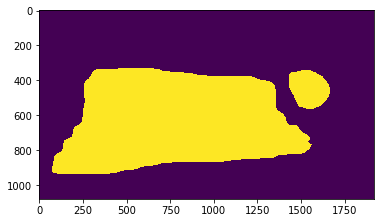

In [6]:
import skimage
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt
start=time.clock()
file_dir="C:/wamp64/www/ThinkingQ/"
list=os.listdir(file_dir)
list.sort(key=lambda fn: os.path.getmtime(file_dir+fn) if not os.path.isdir(file_dir+fn) else 0)
%matplotlib inline 
IMG_PATH=ROOT_DIR+"/new_data/pic/29.png"
IMG_PATH="C:/wamp64/www/ThinkingQ/"+list[-1]
IMG_PATH="C:/Users/VCC/Desktop/5.jpg"
# IMG_PATH="c:/wamp64/www/ThinkingQ/fetch_camera/1543843247.698073.png"

print(IMG_PATH)
original_image = skimage.io.imread(IMG_PATH)# --- 绝对路径选择图片

results = model.detect([original_image], verbose=1)
# class_names=['BG', 'corner']
# class_names=['BG', 'baby','quilt']
class_names=['BG', 'edge','quilt','corner','head']

r = results[0]
end=time.clock()
def get_ax(rows=1, cols=1, size=8):
    _, ax = plt.subplots(rows, cols, figsize=(size * cols, size * rows))
    return ax
print(end-start)
r = results[0]

# 
from samples.shapes.result2mask import result2mask as r2m
r2m1=r2m()
print(r)
count=0
mask=np.zeros((r['masks'].shape[0],r['masks'].shape[1]))
for i in range(r['masks'].shape[0]):
    for j in range(r['masks'].shape[1]):
        if (r['masks'][i][j]+0).sum()>0:
            count+=1
            mask[i][j]+=1
print("the bounding box of leftup and rightdowm:",r['rois'])
print('scores:')
for i in r['rois']:
    print((i[0] + i[2]) / 2)
    print((i[1] + i[3]) / 2)

plt.imshow(mask)
print((r['masks'][0][0]+0).sum())
print('gripper point:')
for i in r['rois']:
    print((i[0] + i[2]) / 2)
    print((i[1] + i[3]) / 2)

plt.imshow(visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'], ax=get_ax()))
plt.show()
